## DATA IMBALANCE


Imbalanced data refers to a situation where the number of observations is not the same for all the classes in a classification dataset.




### why doing data balancing 

Machine learning algorithms are susceptible to returning unsatisfactory predictions when trained on imbalanced datasets. This is because the classifier often learns to simply predict the majority class all of the time. so if we balance the data the machine learning algorith can be able to produce satisfactory predictions.

### what data are we balancing?

We balance data tha vary too much tha can lead machine learning algorithm to predict majority class all of the time that lead to inaccurate prediction.

### metheds used to balance data

1. Change the performance metric

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

   Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
    
   Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    
   Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    
   F1: Score: the weighted average of precision and recall.
   
   
 2. Change the algorithm

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

3. Resampling Techniques 

   1.Oversample minority class


Oversampling can be defined as adding more copies of the minority class. 
Oversampling can be a good choice when you don’t have a ton of data to work with.

   2. Undersample majority class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set

4.  Generate synthetic samples

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [28]:
#demonstrating imbalance data

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [30]:
data = pd.read_csv('data/train_data_week_1_challenge.csv')
data.head(4)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0


In [31]:
#Data Cleaning
cleanup= {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

data.replace(cleanup, inplace=True)

data.internet = data.internet.astype(int)
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,2,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,0,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,0,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,1,1,364,147,28.0,1911.0
4,1,s11132,0,1,0.283,0.478,0.283,1,10,0,1,394,122,15.0,1889.0


In [8]:
#copying count drop into target variable
target = data['continue_drop'].copy()

In [9]:
#checking for imbalance
target.value_counts()

1    16384
0      806
Name: continue_drop, dtype: int64

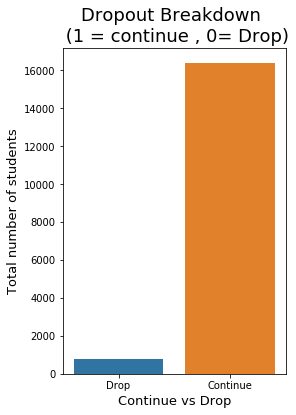

In [32]:
#visualizing Imbalanced Data
import seaborn as sea
plt.figure(figsize=(4,6))
sea.countplot(data['continue_drop'])
plt.title("Dropout Breakdown \n (1 = continue , 0= Drop)", fontsize=18)
plt.xlabel('Continue vs Drop' , fontsize=13);
plt.ylabel('Total number of students' , fontsize=13);
labels = ['Continue','Drop']
val = [1,0]
plt.xticks(val, labels);

## Handling Data Imbalance

In [13]:

majority = data[data['continue_drop']==1]
minority = data[data['continue_drop']==0]

In [14]:
majority.shape

(16384, 15)

In [15]:
minority.shape

(806, 15)

In [33]:
count_1,count_0 = data['continue_drop'].value_counts()

In [18]:
#upsampling minority class to close match majority class
upsampled =minority.sample(count_1, replace=True)
upsampled.sample(5)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
5976,0,s02612,1,0,0.389,0.216,0.389,6,5,0,1,338,145,2.0,1929.0
12630,0,s12668,0,0,0.551,0.820,0.551,4,9,0,1,304,390,28.0,1914.0
7983,0,s06622,0,0,0.697,0.947,0.697,6,3,0,1,315,280,1.0,1923.0
14506,0,s06729,1,0,0.725,0.556,0.725,6,2,1,1,365,444,14.0,1970.0
11633,0,s02499,1,0,0.438,0.495,0.438,5,3,0,1,334,571,61.0,1924.0


In [19]:
data_balanced1 = pd.concat([upsampled,majority], axis= 0)

In [20]:
# Downsampling majority class to close match minority class
downsampled = majority.sample(count_1 ,random_state=100)

In [21]:

data_balanced = pd.concat([upsampled,downsampled] , axis = 0)

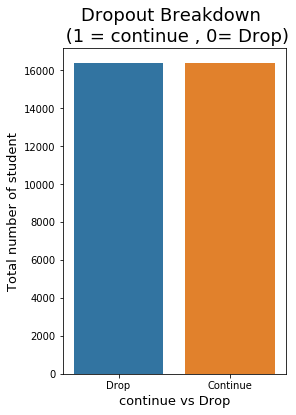

In [27]:
# visualise balanced data 
plt.figure(figsize=(4,6))
sea.countplot(data_balanced['continue_drop'])
plt.title("Dropout Breakdown \n (1 = continue , 0= Drop)", fontsize=18)
plt.xlabel('continue vs Drop' , fontsize=13);
plt.ylabel('Total number of student' , fontsize=13);
labels = ['Continue','Drop']
val = [1,0]
plt.xticks(val, labels);